In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [11]:
!kaggle datasets download -d salader/dogsvscats

Dataset URL: https://www.kaggle.com/datasets/salader/dogsvscats
License(s): unknown
 98% 1.04G/1.06G [00:15<00:00, 61.0MB/s]
100% 1.06G/1.06G [00:15<00:00, 71.8MB/s]


In [12]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogsvscats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [14]:
#generators
#This help to split large data in batches
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
#give data in numpy (0-255)
#we need to normalize from 0 to 1

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
#normalize
#Raw image data contains pixel values from 0 to 255.
#A process function divides these values by 255.0 to scale them between 0 and 1. This helps the neural network converge faster.
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [16]:
#CNN Model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,879,809 (64.39 MB)

 Trainable params: 16,879,361 (64.39 MB)

 Non-trainable params: 448 (1.75 KB)

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 94ms/step - accuracy: 0.5396 - loss: 2.5584 - val_accuracy: 0.6232 - val_loss: 0.6779
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 90ms/step - accuracy: 0.6111 - loss: 0.6587 - val_accuracy: 0.6280 - val_loss: 0.6330
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.6047 - loss: 0.6584 - val_accuracy: 0.6396 - val_loss: 0.6399
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.6568 - loss: 0.6245 - val_accuracy: 0.7124 - val_loss: 0.5747
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.7262 - loss: 0.5545 - val_accuracy: 0.7424 - val_loss: 0.5378
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 94ms/step - accuracy: 0.7703 - loss: 0.5034 - val_accuracy: 0.7682 - val_loss: 0.5006
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.7947 - loss: 0.4678 - val_accuracy: 0.7758 - val_loss: 0.4903
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.8258 - loss: 0.4112 - 

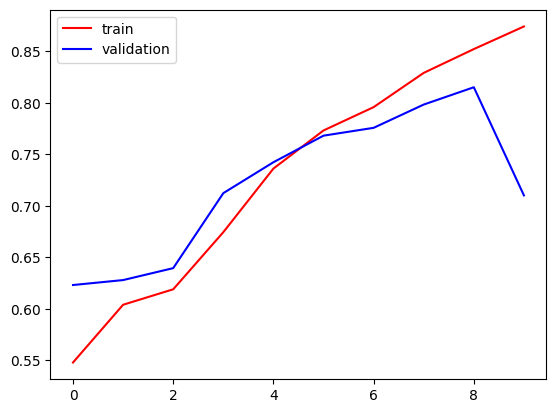

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

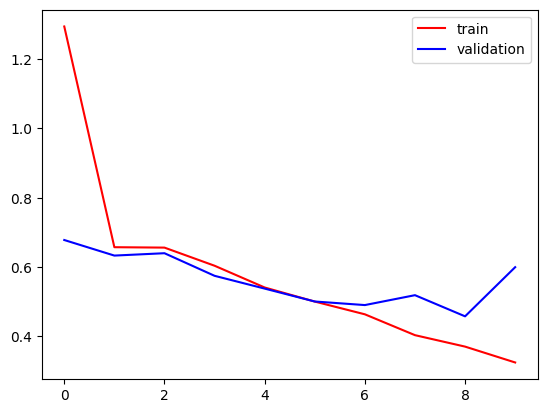

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [22]:
import cv2

DOG


In [25]:
testing=cv2.imread('/content/dog.webp')

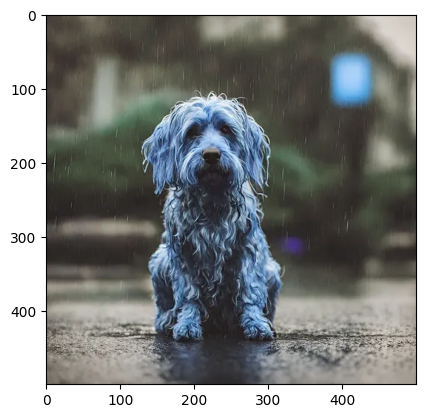

In [26]:
plt.imshow(testing)

In [27]:
testing.shape

(500, 500, 3)

In [28]:
testing=cv2.resize(testing,(256,256))

In [29]:
testing_input=testing.reshape((1,256,256,3))

In [30]:
model.predict(testing_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

CAT

In [31]:
testing2=cv2.imread('/content/cat.webp')

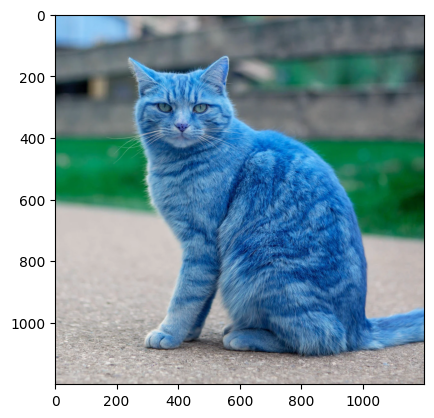

In [32]:
plt.imshow(testing2)

In [33]:
testing2.shape

(1200, 1200, 3)

In [34]:
testing2=cv2.resize(testing2,(256,256))

In [35]:
testing_input2=testing2.reshape((1,256,256,3))

In [36]:
model.predict(testing_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.17837764]], dtype=float32)

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
batch_size=16
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
    )
validation_generator=train_datagen.flow_from_directory(
    '/content/test',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
    )

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [47]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Activation, BatchNormalization, Dropout

#CNN Model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [48]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
model.fit(
    train_generator,
    steps_per_epoch=2000 //batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=800 //batch_size
)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5412 - loss: 5.3529

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 146ms/step - accuracy: 0.5411 - loss: 5.3303 - val_accuracy: 0.5238 - val_loss: 0.9984
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.5152 - loss: 0.8471 - val_accuracy: 0.5250 - val_loss: 5.4084
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 140ms/step - accuracy: 0.5764 - loss: 0.6932 - val_accuracy: 0.4863 - val_loss: 1.1334
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 167ms/step - accuracy: 0.5574 - loss: 0.7087 - val_accuracy: 0.6087 - val_loss: 0.6734
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.5675 - loss: 0.6858 - val_accuracy: 0.6725 - val_loss: 0.6414
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 152ms/step - accuracy: 0.5809 - loss: 0.6881 - val_accuracy: 0.5813 - val_loss: 0.6836
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - accuracy: 0.5805 - loss: 0.6807 - val_accuracy: 0.7200 - val_loss: 0.5906
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.6533 - loss: 0.6320 - val

KeyboardInterrupt: 